# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Menna Hatem

ID: 55-4397

Tutorial: T-8

---

Name: Aya Hella

ID: 55-0755

Tutorial: T-8

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df.info()
df.describe()
#df.isnull().sum()
#corr = df.corr(numeric_only=True)
#corr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  object 
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 5.3+ MB


,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
# 1. Convert 'odometer' to numeric (removing 'mi' and commas)
df['odometer'] = df['odometer'].replace({'mi': '', ',': ''}, regex=True).astype(float)

# 2. Ensure 'sellingprice' is in the correct format (as integer)
df['sellingprice'] = df['sellingprice'].replace({'\$': '', ',': ''}, regex=True).astype(int)

# 3. Standardize categorical variables
df['body'] = df['body'].str.strip().str.lower()  # Standardizing 'body' to lowercase and removing spaces
df['transmission'] = df['transmission'].str.strip().str.lower()  # Standardizing 'transmission'

# 4. Handling any inconsistencies in categorical columns (example for 'condition')
# You can add any additional specific standardization here if needed.

# 5. Drop unnecessary columns if they are not needed for analysis
# Drop 'vin', 'sale_date', and 'sale_time' as they may not be relevant
#df.drop(columns=['vin', 'sale_date', 'sale_time'], inplace=True)  # Adjust based on your needs

# 6. Check for duplicates and remove if necessary
df.drop_duplicates(inplace=True)

# 7. Reduce the ’body’ categories into a few main types

# Convert all entries in 'body' to lowercase for consistency
df['body'] = df['body'].str.lower()

df['body'] = df['body'].apply(lambda x:
    'Pickup Truck' if 'cab' in x else
    'Pickup Truck' if 'supercrew' in x else
    'Sedan' if 'sedan' in x else
    'Coupe' if 'coupe' in x else
    'Coupe' if 'koup' in x else
    'Convertible' if 'convertible' in x else
    'SUV' if 'suv' in x else
    'Hatchback' if 'hatchback' in x else
    'Minivan' if 'van' in x else
    'Wagon' if 'wagon' in x else
    x)

# 8. Display cleaned DataFrame info
df.info()

# 9. Display the first few rows of the cleaned DataFrame
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  int64  
 14  saledate      46578 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.3+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

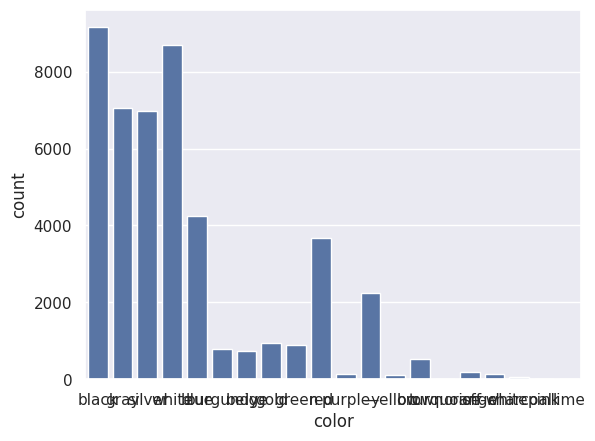

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

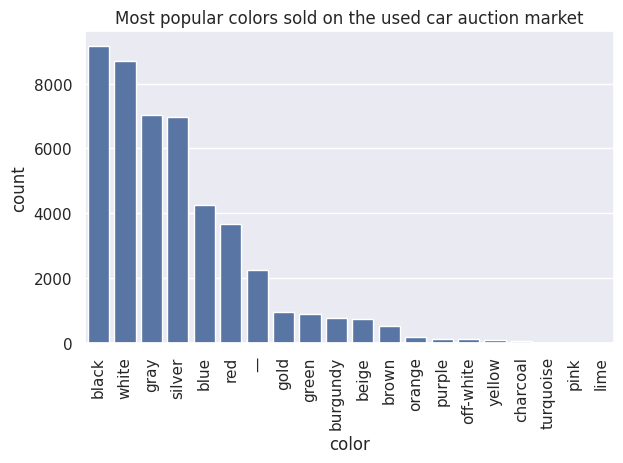

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

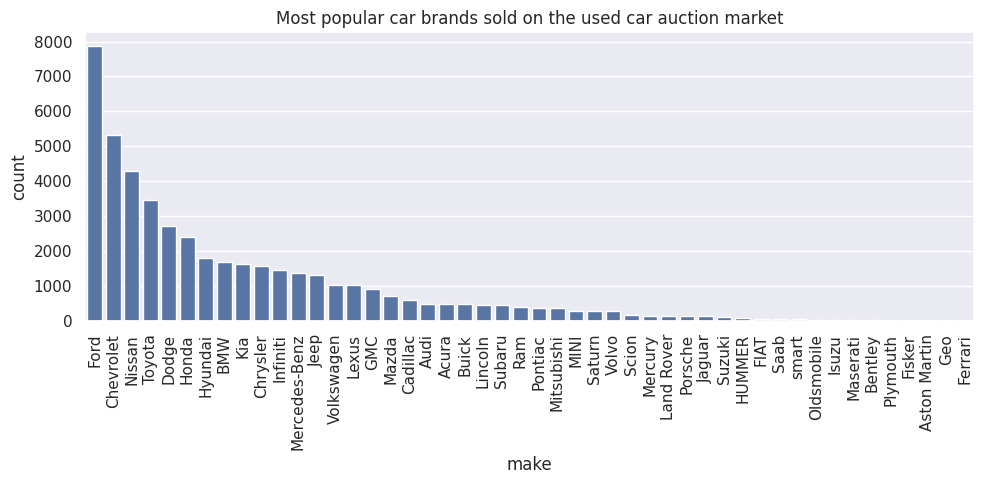

In [ ]:
plt.figure(figsize=(10,5))
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: the most popular 3 car brands are Ford, Chevrolet, and Nissan

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

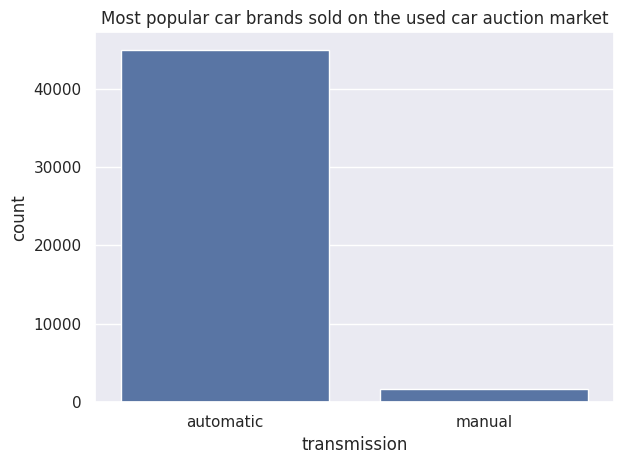

In [ ]:
large_to_small = df.groupby('transmission').size().sort_values(ascending=False)
sns.countplot(x='transmission', data=df, order=large_to_small.index).set(title='Most popular car brands sold on the used car auction market')

plt.tight_layout()

**Answer for Q2**: yes, automatic cars sell way more than manual ones

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

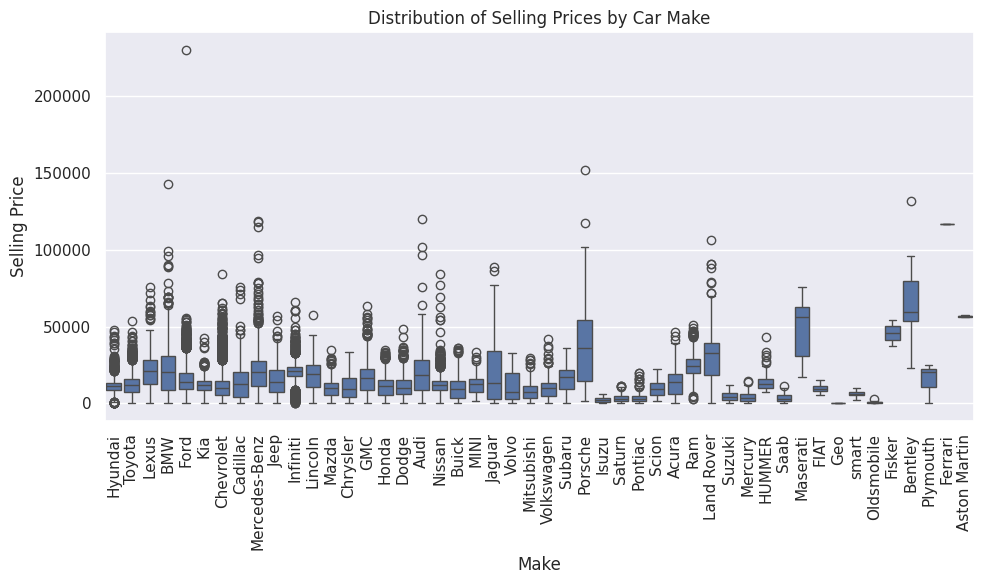

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='make', y='sellingprice', data=df).set(title='Distribution of Selling Prices by Car Make')
plt.xlabel('Make')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q3**: BMW, Ford, and Mercedes Benz are exmaples of cars with wide dispertion of selling prices

the most expensive cars are Porsche and BMW and Bentley

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

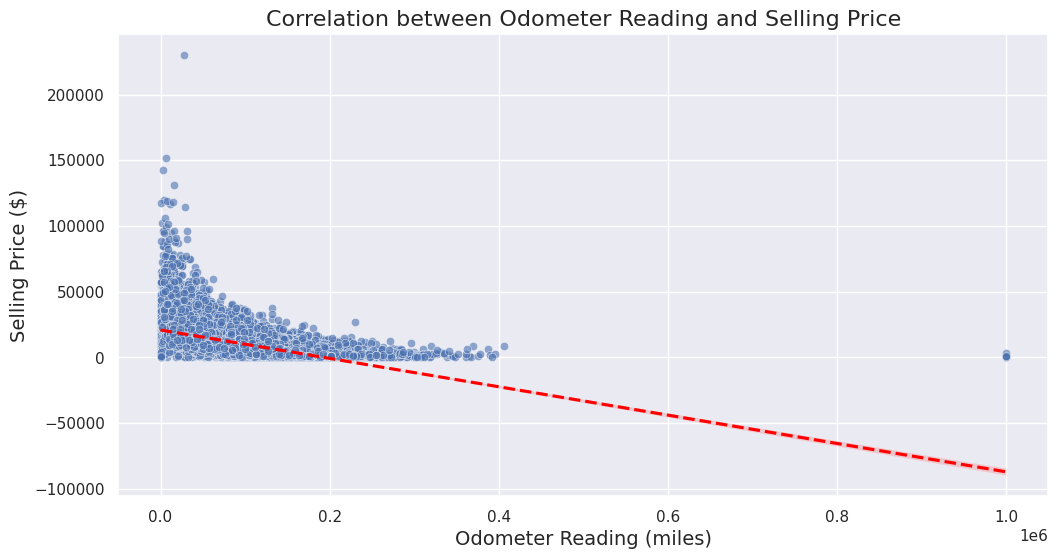

In [ ]:
# Q4: How correlated is the odometer reading or mileage with the car's sale price?

# Convert 'odometer' and 'sellingprice' to numeric if not already done
df['odometer'] = df['odometer'].replace({'mi': '', ',': ''}, regex=True).astype(float)
df['sellingprice'] = df['sellingprice'].replace({'\$': '', ',': ''}, regex=True).astype(int)

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='odometer', y='sellingprice', data=df, alpha=0.6)

# Fit a linear regression line (line of best fit)
sns.regplot(x='odometer', y='sellingprice', data=df, scatter=False, color='red', line_kws={"linestyle":"--"})

# Add labels and title
plt.title('Correlation between Odometer Reading and Selling Price', fontsize=16)
plt.xlabel('Odometer Reading (miles)', fontsize=14)
plt.ylabel('Selling Price ($)', fontsize=14)
plt.grid(True)
plt.show()


**Answer for Q4**: selling price and odometer reading are strongly negatively correlated to each other, as the graph shows a downward slope from top right to left bottom

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

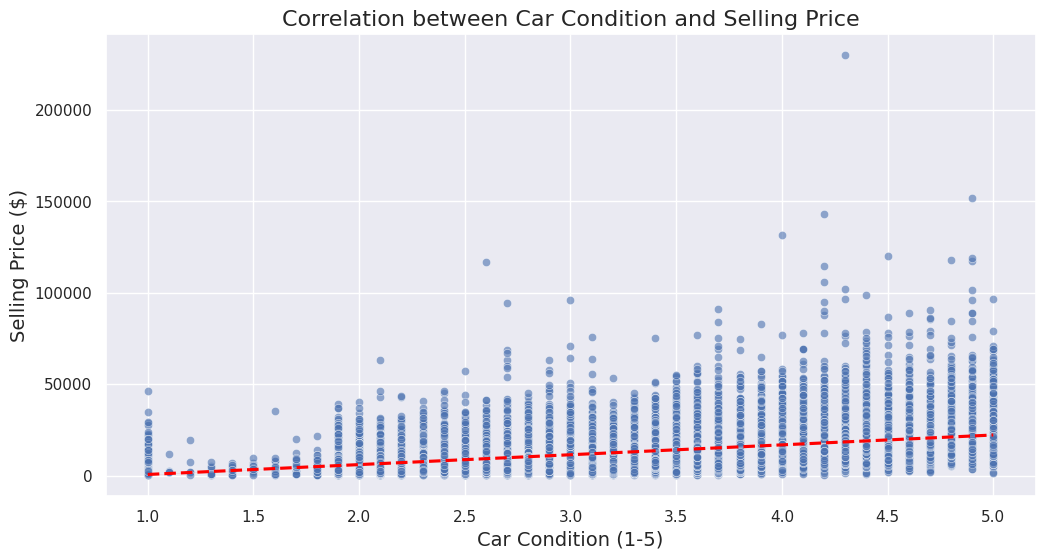

In [ ]:
# Q5: How correlated is the car's condition with its sale price?

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='condition', y='sellingprice', data=df, alpha=0.6)

# Fit a linear regression line (line of best fit)
sns.regplot(x='condition', y='sellingprice', data=df, scatter=False, color='red', line_kws={"linestyle":"--"})

# Add labels and title
plt.title('Correlation between Car Condition and Selling Price', fontsize=16)
plt.xlabel('Car Condition (1-5)', fontsize=14)
plt.ylabel('Selling Price ($)', fontsize=14)
plt.grid(True)
plt.show()


**Answer for Q5**: this shows a weak positive correlation between selling price and car condition as the graph is showing a sligh upward slope

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

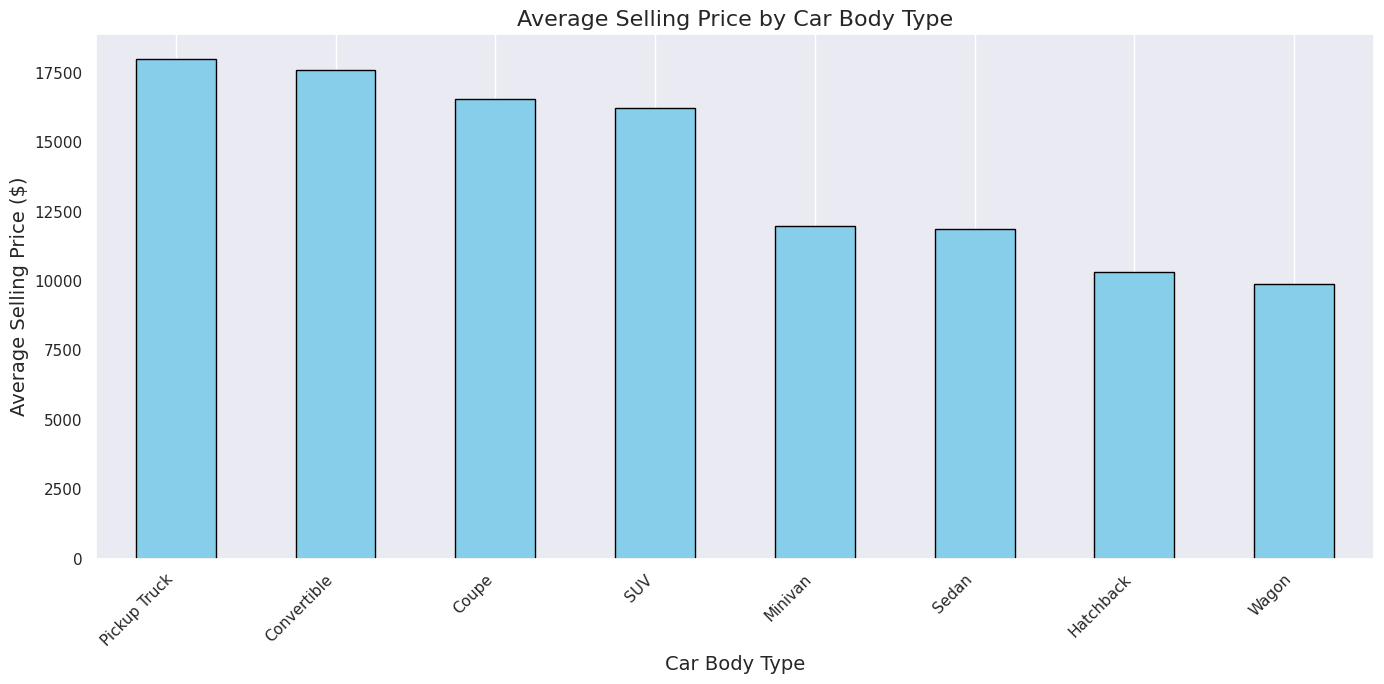

In [ ]:
# Q6: Draw a bar plot showing the selling price of each of the body categories.

# Calculate the mean selling price for each body type
mean_prices_by_body = df.groupby('body')['sellingprice'].mean().sort_values(ascending=False)

# Create a bar plot with improved aesthetics
plt.figure(figsize=(14, 7))  # Increase the figure size
mean_prices_by_body.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Average Selling Price by Car Body Type', fontsize=16)
plt.xlabel('Car Body Type', fontsize=14)
plt.ylabel('Average Selling Price ($)', fontsize=14)

# Rotate x-tick labels and adjust their position
plt.xticks(rotation=45, ha='right')  # Rotate and align to the right
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.grid(axis='y')
plt.show()



**Answer for Q6**: the graph shows the differences between the car body types sorted from most expensive to least expensive.
The most expensive car body type is the pickup truck
and The least expensive body type is the wagon

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
# Remove outliers in selling_price column
indices_to_drop = df[df['sellingprice'] > 200000].index
df = df.drop(indices_to_drop)

# Identify categorical columns to encode
# categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller', 'saledate']
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']

# Apply one-hot encoding with dtype=int8
df_encoded = pd.get_dummies(data=df,
                            columns=categorical_columns,
                            drop_first=True,
                            dtype='int8')

# Show the changes to the dataset
print("Original dataset shape:", df.shape)
print("Encoded dataset shape:", df_encoded.shape)

# Display the first few rows of the encoded dataset
df_encoded.head()

# copy the data
df_z_scaled = df.copy()

# apply normalization techniques
for column in df_z_scaled.select_dtypes(include=['float', 'int']).columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()

# view normalized data
display(df_z_scaled)



Original dataset shape: (46577, 15)
Encoded dataset shape: (46577, 1873)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,0.729953,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,0.503971,-0.317099,black,gray,the hertz corporation,-0.288627,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,0.990960,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,1.563282,-0.944800,gray,—,award auto sales and leasing inc,1.694659,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,0.468946,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,0.715834,-0.881640,silver,black,lexus financial services,1.099674,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,-2.141123,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,-1.614650,1.512504,black,black,peddle llc,-1.092379,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,0.990960,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,1.563282,-1.159419,white,gray,u-haul,0.880468,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,0.729953,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,0.080247,-0.270057,—,gray,wheels exchange llc,0.348113,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,0.468946,Infiniti,G Sedan,G37 Journey,Sedan,automatic,jn1cv6ap9cm623162,ca,1.139558,-0.841867,black,black,nissan infiniti lt,0.817838,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,0.729953,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,0.821765,-0.414402,white,beige,motorcars of south texas,0.870030,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,0.729953,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,0.080247,-0.452595,black,beige,avis rac/san leandro,0.014085,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features (X) and target (y)
X = df_encoded.drop(['sellingprice','vin','seller','saledate'], axis=1)  # Independent variable
y = df_encoded['sellingprice']  # Dependent variable

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(x_train, y_train)

# Output a confirmation
print("Model training completed.")


Model training completed.


## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

Root Mean Squared Error (RMSE): 3320.158314603399
R-squared (R²): 0.8801704827228951


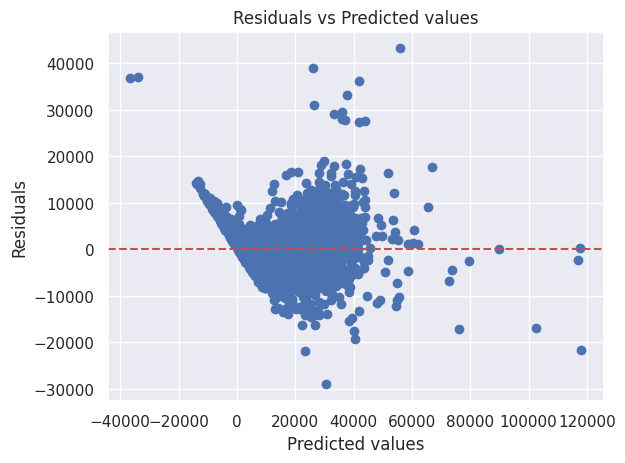

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = lin_reg.predict(x_test)

# Calculate RMSE, and R²
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


# Calculate residuals
residuals = y_test - y_pred

# Plot residuals and validate linearity
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()

#If the residuals are randomly scattered around 0, the linearity assumption is met#



## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: The model is evaluated by Root Mean Squared Error and R-squared. Firstly, the RMSE being approximatly equal to 3320.16 indicates that the model's predictions of prices deviate from the actual prices by $3,320, which is very reasonable for the car market. Also, the R² being 0.88 means that 88% of the variance in car prices is explained by the model, which is a strong fit. However, the residual plot shows some weaknesses as it shows that variance of residuals increase with the predicted price which means that the model's accuracy decreases when the cars' prices increases. There are also some outliers in both positive and negative directions. Even though the model has a strong fit, it can be improved to better predict higher priced cars.